<h4 style="text-align:right">The Course of Computational Physics,&nbsp; Peking University</h4>
***
<p><br>
<h1 style="text-align:center"><font face="宋体" size=6>计算物理学第二次作业</font></h1>
<br></p>
<h2 style="text-align:center"><font face="楷体">姓名:&nbsp;贺鑫</font> </h2>
<h2 style="text-align:center"> <font face="楷体">学号:&nbsp; _1500011805_</font></h2>

***
## 1 Runge 效应
---
> 考虑 Runge 函数 $\,f(x) = 1/(1 + 25x^2 )\,$ 在区间 \[−1, +1\]上的行为。本题中将分别利用等间距的多项式内插、Chebyshev 内插以及三次样条函数来近似 f (x)的数值 (请提供三种内插相应的程序代码)。  
(a) 考虑 $x \in [−1, +1]$之间 21 个均匀分布的节点 (包括端点,相隔 0.1 一个点) 的 20阶多项式 $P_{20}(x)$ 之内插 (你可以利用各种方法,例如拉格朗日内插、牛顿内插或者 Neville 方法)。给出一个表分别列出 $x,f(x),P_{20}(x)$ 以及两者差的绝对值。为了看出两者的区别请在这 21 个点分成的每个小段的中点也取一个数据点并一起列出 (因此共有 41 个点),同时画图显示之。  
(b) 现在选取 n = 20 并将上问中均匀分布的节点换为标准的Chebyshev 节点:
$$x_{k}=cos(\frac{\pi (k+1/2)}{20}),\,k=0,1,2,\dots,19$$
然后构造 f (x) 在 \[−1, +1\] 上的近似式,
$$f(x)\approx C(x)=-\frac{a_0}{2}+\sum_{k=0}^{20}c_{k}T_{k}(x)$$
其中在各个 Chebyshev 的节点处我们要求它严格等于 f (x)。同样列出上问的表并画图,与上问结果比较。  
(c) 仍然考虑第一问中均匀分布的 21 个节点的内插。但这次利用 21 点的三次样条函数。重复上面的列表、画图并比较。

> a) solution  
本题分别使用拉格朗日内插、牛顿内插和Neville内插，三段程序如下：

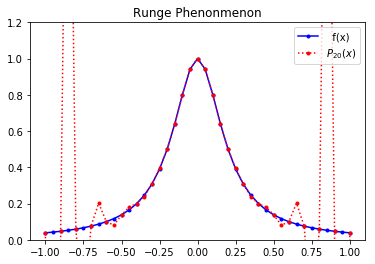

       P20(x)      f(x)     x
0    0.038462  0.038462 -1.00
1  -39.952449  0.042440 -0.95
2    0.047059  0.047059 -0.90
3    3.454958  0.052459 -0.85
4    0.058824  0.058824 -0.80
5   -0.447052  0.066390 -0.75
6    0.075472  0.075472 -0.70
7    0.202423  0.086486 -0.65
8    0.100000  0.100000 -0.60
9    0.080660  0.116788 -0.55
10   0.137931  0.137931 -0.50
11   0.179763  0.164948 -0.45
12   0.200000  0.200000 -0.40
13   0.238446  0.246154 -0.35
14   0.307692  0.307692 -0.30
15   0.395093  0.390244 -0.25
16   0.500000  0.500000 -0.20
17   0.636755  0.640000 -0.15
18   0.800000  0.800000 -0.10
19   0.942490  0.941176 -0.05
20   1.000000  1.000000  0.00
21   0.942490  0.941176  0.05
22   0.800000  0.800000  0.10
23   0.636755  0.640000  0.15
24   0.500000  0.500000  0.20
25   0.395093  0.390244  0.25
26   0.307692  0.307692  0.30
27   0.238446  0.246154  0.35
28   0.200000  0.200000  0.40
29   0.179763  0.164948  0.45
30   0.137931  0.137931  0.50
31   0.080660  0.116788  0.55
32   0.100

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-1,1,num=21)
x2=np.linspace(-1,1,num=41)
f=1/(1+25*x*x)
f2=1/(1+25*x2*x2)
#------------------------Lagrange interpolation---------------
P2=np.zeros(41)
for i in range(41):
    # calculate P(i)
    L=np.ones(21)
    for j in range(21):
        # calculate L(j), the lagrangian ploynomial
        for k in range(21):
            if(k==j):
                continue
            L[j]=L[j]*(x2[i]-x[k])/(x[j]-x[k])
    P2[i]=np.dot(f,L)
plt.plot(x2,f2,'b.-',x2,P2,'r.:')
plt.ylim((0,1.2))
plt.title('Runge Phenonmenon')
plt.legend(['  f(x)',r'$P_{20}(x)$'],loc=1)
plt.savefig('interpolation_1.png')
plt.show()

lst=pd.DataFrame({'P20(x)':P2,'x':x2,'f(x)':f2})
lst.to_csv('interpolation_1.dat')
print(lst)

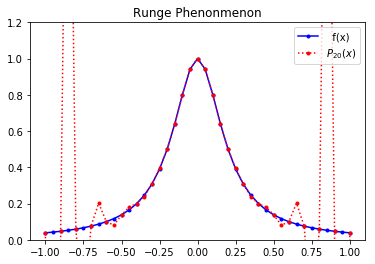

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-1,1,num=21)
x2=np.linspace(-1,1,num=41)
f=1/(1+25*x*x)
f2=1/(1+25*x2*x2)
#------------------------Newton interpolation---------------
P2=np.zeros(41)
a=np.zeros(21) 
# at first, calculate coeffecient matrix a
for j in range(21):
    # calculate a(j)
    a[j]=f[j]
    for k in range(j):
        tmp=1
        for m in range(k):
            tmp=tmp*(x[j]-x[m])
        a[j]=a[j]-tmp*a[k]
    for k in range(j):
        a[j]=a[j]/(x[j]-x[k])
# and then, calculate sampling points of P20(x)
for i in range(41):
    for j in range(21):
        tmp=1
        for k in range(j):
            tmp=tmp*(x2[i]-x[k])
        P2[i]=P2[i]+tmp*a[j]
plt.plot(x2,f2,'b.-',x2,P2,'r.:')
plt.ylim((0,1.2))
plt.title('Runge Phenonmenon')
plt.legend(['  f(x)',r'$P_{20}(x)$'],loc=1)
plt.show()
# this section is not saved to csv or fig, for any polynomial interpolation should be all same!

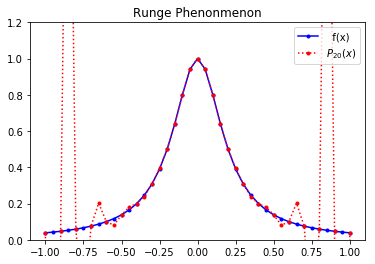

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

x=np.linspace(-1,1,num=21)
x2=np.linspace(-1,1,num=41)
f=1/(1+25*x*x)
f2=1/(1+25*x2*x2)
#------------------------Neville interpolation---------------
P2=np.zeros(41)
T=np.zeros((21,21)) # as the Neville's tree
T[0,]=f
for i in range(41):
    for j in range(1,21):
        for k in range(1,j+1):
            T[k,j]=((x2[i]-x[j-k])*T[k-1,j]-(x2[i]-x[j])*T[k-1,j-1])/(x[j]-x[j-k])
    P2[i]=T[20,20]  
plt.plot(x2,f2,'b.-',x2,P2,'r.:')
plt.ylim((0,1.2))
plt.title('Runge Phenonmenon')
plt.legend(['  f(x)',r'$P_{20}(x)$'],loc=1)
plt.show()

> b) solution  
首先，通过: 
$$c_m=\frac{2}{N}\sum_{k=0}^{N-1}f(x_k)cos(\frac{\pi m (k+1/2)}{N}),\; m=0,1,2,\dots,N ,\;\; (N=20)$$
计算Tchebyshev系数（Fourier展开）$c_m$，显然$\,c_N=0\,$，可以略去不计算。  
然后给定取样点$x$，通过设置递推公式，$b_k(x)=c_k+2xb_{k+1}(x)-b_{k+2}(x),\;(b_{k+1}(x)=b_{k+2}(x)=0)$，可以得到$b_1,b_2$，然后可得：
$$ T_N(x)=\frac{1}{2}c_0+xb_1(x)-b_2(x) $$
可以发现，对于Tchebyshev多项式近似拟合下的结果，虽然在零点中心处有一定的拟合偏差，但没有出现整体拟合发散的情况(即Runge现象)，说明了其较好的控制误差的能力。

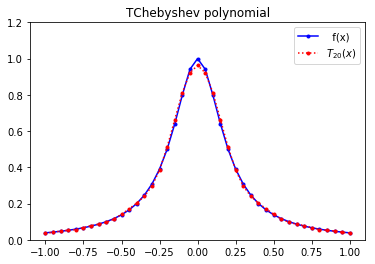

       P20(x)      f(x)     x
0    0.038462  0.038462 -1.00
1  -39.952449  0.042440 -0.95
2    0.047059  0.047059 -0.90
3    3.454958  0.052459 -0.85
4    0.058824  0.058824 -0.80
5   -0.447052  0.066390 -0.75
6    0.075472  0.075472 -0.70
7    0.202423  0.086486 -0.65
8    0.100000  0.100000 -0.60
9    0.080660  0.116788 -0.55
10   0.137931  0.137931 -0.50
11   0.179763  0.164948 -0.45
12   0.200000  0.200000 -0.40
13   0.238446  0.246154 -0.35
14   0.307692  0.307692 -0.30
15   0.395093  0.390244 -0.25
16   0.500000  0.500000 -0.20
17   0.636755  0.640000 -0.15
18   0.800000  0.800000 -0.10
19   0.942490  0.941176 -0.05
20   1.000000  1.000000  0.00
21   0.942490  0.941176  0.05
22   0.800000  0.800000  0.10
23   0.636755  0.640000  0.15
24   0.500000  0.500000  0.20
25   0.395093  0.390244  0.25
26   0.307692  0.307692  0.30
27   0.238446  0.246154  0.35
28   0.200000  0.200000  0.40
29   0.179763  0.164948  0.45
30   0.137931  0.137931  0.50
31   0.080660  0.116788  0.55
32   0.100

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

k=np.linspace(0,19,num=20)
c=np.zeros(20)
x=np.cos( np.pi*(k+0.5)/20 )
x2=np.linspace(-1,1,41)
T2=np.zeros(41)
f=1/(1+25*x*x) # for fitting
f2=1/(1+25*x2*x2) # for sampling
# calculate the coeffecient c
for j in range(20):
    for k in range(20):
        c[j]=c[j]+f[k]*np.cos( np.pi*j*(k+0.5)/20 )
    c[j]=c[j]*2/20
# here we don't calculate the c[20], for c[20] must equals 0
# and then calc T20(x)
for i in range(41):
    b=np.zeros(23)
    for j in range(19,0,-1):
        # for b[20]=...=0, must be 0, we skip such step
        b[j]=c[j]+2*x2[i]*b[j+1] - b[j+2]
    T2[i]=0.5*c[0]+x2[i]*b[1]-b[2]
plt.plot(x2,f2,'b.-',x2,T2,'r.:')
plt.ylim((0,1.2))
plt.title('TChebyshev polynomial')
plt.legend(['  f(x)',r'$T_{20}(x)$'],loc=1)
plt.savefig('Tchebyshev_1.png')
plt.show()

lst=pd.DataFrame({'P20(x)':P2,'x':x2,'f(x)':f2})
lst.to_csv('Tchebyshev_1.dat')
print(lst)

> c) solution
因为选取的是均匀分布的节点，问题简化很多：
$\frac{h_j}{6}M_{j-1}+\frac{h_j+h_{j+1}}{3}M_j+\frac{h_{j+1}}{6}M_{j+1}=\frac{y_{j+1}-y_j}{h_{j+1}}-\frac{y_{j}-y_{j-1}}{h_j}$ 可以化为
$$\frac{h}{6}M_{j-1}+\frac{2h}{3}M_j+\frac{h}{6}M_{j+1}=\frac{y_{j+1}+y_{j-1}-2y_j}{h},\; j=1,2,\dots,N-1$$
考虑额外的两个条件，可以选取：
$$\begin{eqnarray} &S'_{\Delta}(Y;-1)=-M_0\frac{h}{2}+\frac{y_1-y_0}{h}-\frac{h}{6}(M_1-M_0)=-M_0\frac{h}{3}+\frac{y_1-y_0}{h}-\frac{h}{6}M_1\\
&=f'(-1)=\big\{-\frac{50x}{(1+25x^2)^2}\big\}_{x=-1}=25/338
\end{eqnarray}$$
同理，在$\,x=1\,$处也选取类似的控制条件，也有：
$$M_N\frac{h}{3}+\frac{y_N-y_{N-1}}{h}+\frac{h}{6}M_{N-1}=f'(1)=-25/338$$
因此可以进一步利用Thomas算法对这个三对角矩阵进行求解。如下程序：  
拟合的效果则是明显的良好，显著优于一般的多项式拟合和切比雪夫多项式拟合。

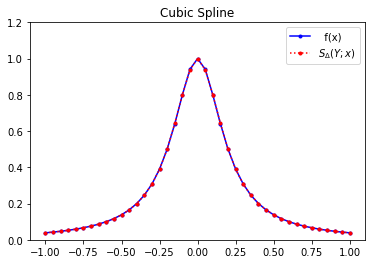

19
     1 x    2 f(x)  3 S(x;t)
0  -1.00  0.038462  0.038462
1  -0.95  0.042440  0.042439
2  -0.90  0.047059  0.047059
3  -0.85  0.052459  0.052457
4  -0.80  0.058824  0.058824
5  -0.75  0.066390  0.066387
6  -0.70  0.075472  0.075472
7  -0.65  0.086486  0.086475
8  -0.60  0.100000  0.100000
9  -0.55  0.116788  0.116786
10 -0.50  0.137931  0.137931
11 -0.45  0.164948  0.164865
12 -0.40  0.200000  0.200000
13 -0.35  0.246154  0.246268
14 -0.30  0.307692  0.307692
15 -0.25  0.390244  0.389420
16 -0.20  0.500000  0.500000
17 -0.15  0.640000  0.643169
18 -0.10  0.800000  0.800000
19 -0.05  0.941176  0.938866
20  0.00  1.000000  1.000000
21  0.05  0.941176  0.938866
22  0.10  0.800000  0.800000
23  0.15  0.640000  0.643169
24  0.20  0.500000  0.500000
25  0.25  0.390244  0.389420
26  0.30  0.307692  0.307692
27  0.35  0.246154  0.246268
28  0.40  0.200000  0.200000
29  0.45  0.164948  0.164865
30  0.50  0.137931  0.137931
31  0.55  0.116788  0.116786
32  0.60  0.100000  0.100000
33  0.65  0

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
nsmp=41

x=np.linspace(-1,1,num=21)
x2=np.linspace(-1,1,num=nsmp)
f=1/(1+25*x*x)
f2=1/(1+25*x2*x2)
# initial the matrix S and B, where SM=B, M is what we want to solve, we just use three diagonal vector to record S!
Sa=np.ones(21)*2/3
Sa[0]=1/3;Sa[20]=1/3;
Sb=np.ones(20)/6;Sc=np.ones(20)/6;
B=np.zeros(21)
B[0]=-25/338+(f[1]-f[0])/0.1
B[20]=-25/338-(f[20]-f[19])/0.1
for j in range(1,20):
    B[j]=(f[j-1]+f[j+1]-2*f[j])/0.1
B=B/0.1

# LU decomposition by Thomas
for j in range(1,21):
    Sb[j-1]=Sb[j-1]/Sa[j-1]
    Sa[j]=Sa[j]-Sb[j-1]*Sc[j-1]
# inverse generation
X=np.zeros(21)
M=np.zeros(21)
X[0]=B[0]
for j in range(1,21):
    X[j]=B[j]-Sb[j-1]*X[j-1]
M[20]=X[20]/Sa[20]
for j in range(19,-1,-1):
    M[j]=(X[j]-Sc[j]*M[j+1])/Sa[j]
# sampling on the cubic spline
S=np.zeros(nsmp)
for i in range(nsmp):
    nth=int((x2[i]+1)//0.1) # determine which section the point should belong to
    A=(f[nth+1]-f[nth])/0.1-0.1*(M[nth+1]-M[nth])/6
    B=f[nth]-M[nth]*0.1*0.1/6
    S[i]=M[nth]*(x[nth+1]-x2[i])**3/(0.6)+M[nth+1]*(x2[i]-x[nth])**3/0.6 + A*(x2[i]-x[nth]) + B
plt.plot(x2,f2,'b.-',x2,S,'r.:')
plt.ylim((0,1.2))
plt.title('Cubic Spline')
plt.legend(['  f(x)',r'$S_{\Delta}(Y;x)$'],loc=1)
plt.savefig('CB_001.png')
plt.show()
print(int((1+1)//0.1))

lst=pd.DataFrame({'1 x':x2,'2 f(x)':f2,'3 S(x;t)':S})
lst.to_csv('CB_001.dat')
print(lst)

## 2 样条函数在计算机绘图的应用

> 本题中我们考虑 Cubic spline 在计算机绘图中的广泛运用。我们将尝试用三次样条函数平滑地连接若干个二维空间中已知的点。考虑二维空间的一系列点 $(x_i , y_i ),i = 0, 1, \dots, n$。我们现在希望按照顺序 (由 0 到 n) 将它们平滑地连接起来。一个方便的办法是引入一个连续参数$ t \in [0, n]$,取节点为$t_i = 0, 1, \dots , n$ 然后分别建立两个样条函数:$S_{\Delta}(X; t)$ 和 $S_{\Delta}(Y ; t)$ 它们分别满足  
$$S_{\Delta}(X; t_i)=x_i$$
$$S_{\Delta}(Y; t_i)=y_i$$
这两个样条函数可以看做是 $(x(t), y(t))$ 的内插近似。因此绘制参数曲线 $(x(t), y(t))$的问题就化为求出两个样条函数并将它们画出的问题。我们考虑的函数是著名的心形线 (cardioid)。它的极坐标方程是
$$r(φ) = 2a(1 − cos φ) = 1(1 − cos φ)$$
为了方便起见我们取了 $2a = 1$。(请利用上一题中关于样条函数内插的相应代码来处理本题)  
(a) 选取$ φ = tπ/4,t = 0, 1, 2, 3, 4, 5, 6, 7, 8$这九个点,给出$x_t = r(φ)cosφ$ 和$y_t = r(φ)sinφ$ 的数值。将这些数值作为精确的数值列在一个表里。  
(b) 给出过这 8 个点的两个三次样条函数 $S_{\Delta}(X; t)$ 和 $S_{\Delta}(Y ; t)$  
(c) 画出参数形式的曲线 $(x_t , y_t ) = (S_{\Delta}(X; t), S_{\Delta}(Y ; t)) $,同时画出它所内插的严格的曲线进行比较,请标出相应的节点。  
(d) 简要说明为什么这个算法可以平滑地连接所有的点 (这实际上是很多画图软件中 spline 曲线所采用的算法)。

> a) solution
将数据处理如下：

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
t=np.linspace(0,8,9)
ps=np.pi*t/4
r=1-np.cos(ps)
xt=r*np.cos(ps)
yt=r*np.sin(ps)

lst=pd.DataFrame({'0,t':t,'1,ps':ps,'2,r':r,'3,xt':xt,'4,yt':yt})
lst.to_csv('xtyt_1.dat')
print(lst)

   0,t      1,ps       2,r          3,xt          4,yt
0  0.0  0.000000  0.000000  0.000000e+00  0.000000e+00
1  1.0  0.785398  0.292893  2.071068e-01  2.071068e-01
2  2.0  1.570796  1.000000  6.123234e-17  1.000000e+00
3  3.0  2.356194  1.707107 -1.207107e+00  1.207107e+00
4  4.0  3.141593  2.000000 -2.000000e+00  2.449294e-16
5  5.0  3.926991  1.707107 -1.207107e+00 -1.207107e+00
6  6.0  4.712389  1.000000 -1.836970e-16 -1.000000e+00
7  7.0  5.497787  0.292893  2.071068e-01 -2.071068e-01
8  8.0  6.283185  0.000000  0.000000e+00 -0.000000e+00


> b) 注意到极坐标中，应该选取周期性边界条件。上一题目中的程序需要适当处理：  
$$\frac{h_j}{6}M_{j-1}+\frac{h_j+h_{j+1}}{3}M_j+\frac{h_{j+1}}{6}M_{j+1}=\frac{x_{j+1}-x_j}{h_{j+1}}-\frac{x_{j}-x_{j-1}}{h_j}$$
t取$0,1,\dots,8$，那么$S_{\Delta}(X;t)$的矩记为$M_j$，$S_{\Delta}(Y;t)$的矩记为$N_j$，考虑到间隔$h_0=h_1=\dots=h=1$，简化为$(j=1,\dots,7)$：
$$\begin{eqnarray}
&\frac{1}{6}M_{j-1}+\frac{2}{3}M_j+\frac{1}{6}M_{j+1}=\frac{x_{j+1}+x_{j-1}-2x_j}{h^2} \\
&\frac{1}{6}N_{j-1}+\frac{2}{3}N_j+\frac{1}{6}N_{j+1}=\frac{y_{j+1}+y_{j-1}-2y_j}{h^2}
\end{eqnarray}$$
以及周期性边界条件要求t=0,t=8两处的一阶、二阶导数连续，即：  
$$\begin{eqnarray}
& M_0=M_8 \\
&-M_0\frac{h}{2}+\frac{x_1-x_0}{h}-\frac{h}{6}(M_1-M_0)=M_8\frac{h}{2}+\frac{x_8-x_7}{h}-\frac{h}{6}(M_8-M_7)
\end{eqnarray}$$
因此我们只用设8个变量足以描述：
$$
\begin{eqnarray}
\begin{pmatrix} \frac{2}{3} & \frac{1}{6} & 0 & 0 & 0 & 0 & 0 & \frac{1}{6} \\
\frac{1}{6} & \frac{2}{3} & \frac{1}{6} & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{6} & \frac{2}{3} & \frac{1}{6} & 0 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{6} & \frac{2}{3} & \frac{1}{6} & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1}{6} & \frac{2}{3} & \frac{1}{6} & 0 & 0 \\
0 & 0 & 0 & 0 & \frac{1}{6} & \frac{2}{3} & \frac{1}{6} & 0 \\
0 & 0 & 0 & 0 & 0 & \frac{1}{6} & \frac{2}{3} & \frac{1}{6} \\
\frac{1}{6} & 0 & 0 & 0 & 0 & 0 & \frac{1}{6} & \frac{2}{3} \\
\end{pmatrix}
\begin{pmatrix}
M_0\\M_1\\M_2\\M_3\\M_4\\M_5\\M_6\\M_7\\
\end{pmatrix}=X\\
X_i=\frac{x_{i-1}+x_{i+1}-2x_i}{h^2},\;\;(here\, let\, x_0=x_8)
\end{eqnarray}$$
对于$N_i$与$y_i$的关系，也完全雷同上述的表达，不再赘述。这样的话，$SM=X,\,RN=Y$，其中$S,\,R$都是非常接近三对角矩阵形式的！可以采用推广的Thomas算法进行快速地计算。程序如下所示：(其中，8个点之间地中点各自插入一个点，方便看图)

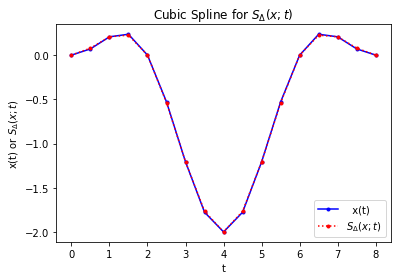

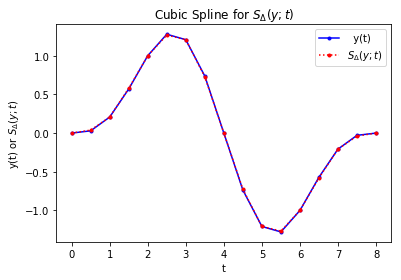

    1 t2          2 xt          3 Sx          4 yt          5 Sy
0    0.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
1    0.5  7.032614e-02  7.906553e-02  2.913004e-02  3.849271e-02
2    1.0  2.071068e-01  2.071068e-01  2.071068e-01  2.071068e-01
3    1.5  2.362368e-01  2.259927e-01  5.703261e-01  5.790655e-01
4    2.0  6.123234e-17  5.551115e-17  1.000000e+00  1.000000e+00
5    2.5 -5.291300e-01 -5.384927e-01  1.277433e+00  1.266566e+00
6    3.0 -1.207107e+00 -1.207107e+00  1.207107e+00  1.207107e+00
7    3.5 -1.777433e+00 -1.766566e+00  7.362368e-01  7.259927e-01
8    4.0 -2.000000e+00 -2.000000e+00  2.449294e-16  2.449294e-16
9    4.5 -1.777433e+00 -1.766566e+00 -7.362368e-01 -7.259927e-01
10   5.0 -1.207107e+00 -1.207107e+00 -1.207107e+00 -1.207107e+00
11   5.5 -5.291300e-01 -5.384927e-01 -1.277433e+00 -1.266566e+00
12   6.0 -1.836970e-16 -1.942890e-16 -1.000000e+00 -1.000000e+00
13   6.5  2.362368e-01  2.259927e-01 -5.703261e-01 -5.790655e-01
14   7.0  2.071068e-01  2

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import myThomas # the Thomas process written by myself
%matplotlib inline
# 本题要求画出过8个点的样条曲线，这里默认每个点间再选一个点采样，如需要改变采样取点密度，请直接修改nsmp
# 为了下一问的方便，本程序同时存储了nsmp=100的数据
nsmp=17

t=np.linspace(0,8,9)
t2=np.linspace(0,8,nsmp)
ps=np.pi*t/4; ps2=np.pi*t2/4;
r=1-np.cos(ps); r2=1-np.cos(ps2);
xt=r*np.cos(ps); xt2=r2*np.cos(ps2);
yt=r*np.sin(ps); yt2=r2*np.sin(ps2);
# at first to solve M1:M7
X=np.zeros(9);Y=np.zeros(9);M=np.zeros(9);N=np.zeros(9);
Sa=np.ones(8)*2/3
Sb=np.ones(7)*1/6; Sc=np.ones(7)*1/6
for i in range(9):
    X[i]=xt[(i+7)%8]+xt[(i+1)%8]-2*xt[i]
    Y[i]=yt[(i+7)%8]+yt[(i+1)%8]-2*yt[i]
M[0:8]=myThomas.quasiThomas(Sa,Sb,Sc,X[0:8],1/6,1/6)
M[8]=M[0]
N[0:8]=myThomas.quasiThomas(Sa,Sb,Sc,Y[0:8],1/6,1/6)
N[8]=N[0]

# sampling on Sx, Sy, with 17 points as t2 described
Sx=np.zeros(nsmp);Sy=np.zeros(nsmp)
for i in range(nsmp):
    nth=int(t2[i]//1) # determine which section the point should belong to
    if nth==8:# for boundary control
        nth=nth-1
    Ax=(xt[nth+1]-xt[nth])/1-1*(M[nth+1]-M[nth])/6
    Bx=xt[nth]-M[nth]*1*1/6
    Ay=(yt[nth+1]-yt[nth])/1-1*(N[nth+1]-N[nth])/6
    By=yt[nth]-N[nth]*1*1/6
    #
    Sx[i]=M[nth]*(t[nth+1]-t2[i])**3/(1*6)+M[nth+1]*(t2[i]-t[nth])**3/(1*6) + Ax*(t2[i]-t[nth]) + Bx
    Sy[i]=N[nth]*(t[nth+1]-t2[i])**3/(1*6)+N[nth+1]*(t2[i]-t[nth])**3/(1*6) + Ay*(t2[i]-t[nth]) + By
plt.plot(t2,xt2,'b.-',t2,Sx,'r.:')
plt.title(r'Cubic Spline for $S_{\Delta}(x;t)$')
plt.xlabel('t')
plt.ylabel(r'x(t) or $S_{\Delta}(x;t)$')
plt.legend(['  x(t)',r'$S_{\Delta}(x;t)$'],loc=4)
plt.savefig('CB_xt_001.png')
plt.show()
plt.plot(t2,yt2,'b.-',t2,Sy,'r.:')
plt.title(r'Cubic Spline for $S_{\Delta}(y;t)$')
plt.xlabel('t')
plt.ylabel(r'y(t) or $S_{\Delta}(y;t)$')
plt.legend(['  y(t)',r'$S_{\Delta}(y;t)$'],loc=1)
plt.savefig('CB_yt_001.png')
plt.show()

lst=pd.DataFrame({'1 t2':t2,'2 xt':xt2, '3 Sx':Sx,'4 yt':yt2,'5 Sy':Sy})
lst.to_csv('SxSy_'+str(nsmp)+'.dat')
print(lst)

> c) solution  
将拟合的曲线和真实的曲线画在一个图中，如下：

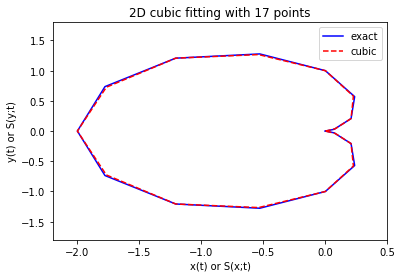

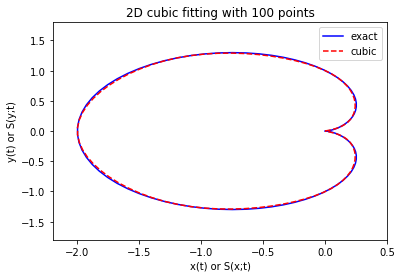

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

lst=pd.read_csv('SxSy_17.dat')
V=lst.values.T[1:]
plt.plot(V[1],V[3],'b-',V[2],V[4],'r--')
plt.xlabel('x(t) or S(x;t)')
plt.ylabel('y(t) or S(y;t)')
plt.title('2D cubic fitting with 17 points')
plt.xlim((-2.2,0.5))
plt.ylim((-1.8,1.8))
plt.legend(('exact','cubic'),loc=1)
plt.show()

# following nsmp=100, if you not run nsmp=100 at the perior block, the following codes might report error, 
# please return above block to revise nsmp=100 and run again!
lst=pd.read_csv('SxSy_100.dat')
V=lst.values.T[1:]
plt.plot(V[1],V[3],'b-',V[2],V[4],'r--')
plt.xlabel('x(t) or S(x;t)')
plt.ylabel('y(t) or S(y;t)')
plt.title('2D cubic fitting with 100 points')
plt.xlim((-2.2,0.5))
plt.ylim((-1.8,1.8))
plt.legend(('exact','cubic'),loc=1)
plt.show()

> d) solution  
之所以能够拟合2D图像，是因为连续性和光滑性(导数的连续性)的传递性：因为$S_{\Delta}(x;t)$对$t$连续，而$S_{\Delta}(y;t)$也对$t$连续，根据传递性，$S_{\Delta}(y;t)$也对$S_{\Delta}(x;t)$连续！同理，因为$S_{\Delta}(x;t)$对$t$连续，而$S'_{\Delta}(y;t)$对$t$连续，根据传递性，$S'_{\Delta}(y;t)$对$S_{\Delta}(x;t)$连续,$S'_{\Delta}(x;t)$对$S_{\Delta}(y;t)$连续,$S'_{\Delta}(y;t)$对$S'_{\Delta}(x;t)$也连续，进而说明拟合的曲线也必然是光滑的！

## 含有Zeta函数的方程的求解

> 在格点量子色动力学的研究中会遇到一种称为 zeta 函数的特殊函数,它的形式定义为:
$$\mathcal{Z}_{lm}(s;q^2) = \sum_{\mathbf{n}\in \mathbb{Z}^3}\frac{\mathcal{Y}_{lm}(\mathbf{n})}{(\mathbf{n}^2-q^2)^s}$$
其中 $s$ 为一个复的参数, $\mathbf{n} \in \mathbb{Z}^3 $ 为三维整数, $\mathcal{Y}_{lm} (r) = r^{l}Y_{lm}(\Omega_r)$ 是关于 $r = (x, y, z)$
的 $l$ 次齐次函数 (其中 $Y_{lm}$ 是标准的球谐函数)。我们经常用到的情形是 $ s = 1 $ 并且$ l = m = 0 $ 的情形。这时$ \mathcal{Y}_{00} = 1/\sqrt{4π}$。注意这个表达式在 $s = 1$ 的时候是发散的,因此必须进行解析延拓。最后经过一系列的变形,适合进行数值计算的表达式为: 
$$\begin{eqnarray}
&\mathcal{Z}_{lm}(1;q^2)&=\sum_{\mathbf{n}}\frac{\mathcal{Y}_{lm}(\mathbf{n})e^{q^2-\mathbf{n}^2}}{\mathbf{n}^2-q^2}-\pi\delta_{l0}\delta_{m0}+\frac{\pi}{2}\delta_{l0}\delta_{m0}\int_{0}^{1}dt t^{-3/2}(e^{tq^2}-1) \\
&&+\pi\int_{0}^{1}dt t^{-3/2}\sum_{\mathbf{n}\ne 0}\mathcal{Y}_{lm}(-i\frac{\pi}{t}\mathbf{n})e^{tq^2}e^{-(\pi^2/t)\mathbf{n}^2}
\end{eqnarray}$$
大家可以验明上式中的各个积分都是收敛的。请注意,虽然上述表达式中貌似包含无穷的求和,但是考虑到数值上 $e^{−\mathbf{n}^2}$ 和 $e^{−(π^2 /t)\mathbf{n}^2}$ 的因子衰减的非常快,因此实际上无穷求和中只需要真正计算有限多项即可。  
(a) 请分析一下,对于参量 $q^2 \in (0, 3)$,如果要求 zeta 函数 $\mathcal{Z}_{00}(1;q^2)$ 的精度达到六位或 12 位有效数字,那么计算公式 (6) 中的无穷求和分别至少应保留多少项?(最小可以从 $q^2 = 0.001 $开始,并给出更小的 $q^2$ 的渐进行为即可)  
(b) 在数值模拟研究中,上述 zeta 函数与两个粒子的散射相移 $\delta_l(q^2)$ (其中的 $q^2$ 与两个粒子相对的动量平方 $k^2$ 成正比) 联系在一起:
$$ π^{3/2}q cot\delta_0(q^2) = \mathcal{Z}_{00}(1;q^2) $$
在低能散射过程中,$q^2 \ll 1$，这时散射相移可以展开为:
$$q cot \delta_0 (q^2) =\frac{1}{A_0}+\frac{R_0}{2}q^2 + \dots$$
其中的 $A_0$ 称为 (无量纲的) 散射长度而 $R_0$ 则称为 (无量纲的) 有效力程。如果对某个低能散射过程 (即 $q^2 \ll 1$) 而言，$A_0 = 1.0,\,R_0 = 0.5$，结合上述两式解出一个合理的 $q^2$ 值来 (请给出六位有效数字)。

> a) solution
当我们考虑$\mathcal{Z}_{00}$时，积分会简单地写作：
$$\begin{eqnarray}
&\mathcal{Z}_{00}(1;q^2)&=\frac{1}{\sqrt{4\pi}}\sum_{\mathbf{n}}\frac{e^{q^2-\mathbf{n}^2}}{\mathbf{n}^2-q^2}-\pi+\frac{\pi}{2}\int_{0}^{1}dt t^{-3/2}(e^{tq^2}-1) \\
&&+\sqrt{\frac{\pi}{4}}\int_{0}^{1}dt t^{-3/2}\sum_{\mathbf{n}\ne 0}e^{tq^2}e^{-(\pi^2/t)\mathbf{n}^2}
\end{eqnarray}$$
对于上式中单独列出的积分，由于在t=0处被积函数发散，造成了很大的不方便(然而做变元代换，有很发现积分空间太大，收敛过慢的现象\[参下分析\]);然而可以发现，这个积分可以展开成级数形式如下，并且收敛速度极快(显然对于$q^2\in (0,3)$只需要$n\sim30$，误差可以控制在$\sim \frac{1}{30-1/2}\frac{3^{30}}{30!}\approx 2\times 10^{-20}$的量级，并且计算量不是很大)：
$$\begin{eqnarray}
&\int_0^1dtt^{-3/2}(e^{tq^2}-1) = \int_0^1dtt^{-3/2}\sum_{n=1}^{\infty}\frac{1}{n!}t^nq^{2n}
=\sum_{n=1}^{\infty}\frac{1}{n-1/2}\frac{1}{n!}q^{2n}
\end{eqnarray}$$
进一步考虑变元替换(为避免积分计算的被积函数的奇值)$y=1/\sqrt{t}$：
$$\begin{eqnarray}
&\mathcal{Z}_{00}(1;q^2)&=\frac{1}{\sqrt{4\pi}}\sum_{\mathbf{n}}\frac{e^{q^2-\mathbf{n}^2}}{\mathbf{n}^2-q^2}-\pi+\frac{\pi}{2}\sum_{n=1}^{\infty}\frac{1}{n-1/2}\frac{1}{n!}q^{2n} \\
&&+\sqrt{\pi}\int_{1}^{\infty}dy\sum_{\mathbf{n}\ne 0}e^{q^2/y^2}e^{-(\pi^2y^2)\mathbf{n}^2}
\end{eqnarray}$$
后文中为方便，我们可以记，
$$\begin{eqnarray}
&A_{n^2}&=\frac{e^{q^2-n^2}}{n^2-q^2},\\
&B_{n^2}&=\int_{0}^{1}dt t^{-3/2}e^{tq^2}e^{-(\pi^2/t)n^2}=2\int_1^{\infty}dy e^{q^2/y^2}e^{-\pi^2n^2y^2}\\
&&(here\;let\;B_0=\int_0^1dtt^{-3/2}(e^{tq^2}-1)=\sum_{n=1}^{\infty}\frac{1}{n-1/2}\frac{1}{n!}q^{2n} ）
\end{eqnarray}$$
显然$A_{n^2}$和$B_{n^2}$都是随n的增加而迅速减小的，因此为保证相对精度，可以间接地要求
$|A_{k^2}/A_0|<\epsilon,\;|B_{k^2}/B_1|<\epsilon$
，这样求和截止到$k^2$即可。  
同时虽然积分范围虽然扩大到$(1,\infty)$，但积分会随y增大而迅速衰减，一般对于$y>3$，对于被积函数$\;< e^{-9\pi^2}=2.6 \times 10^{-39}$
就基本可以在误差范围内忽略了。

> 估算各个积分的范围：(先考虑$B_0$) 
$$B_0=\sum_{n=1}^{\infty}\frac{1}{n-1/2}\frac{1}{n!}q^{2n} \ge \int_0^1dtt^{-3/2}tq^2=2q^2,\;(as\,poper\,approximation\,when\,q^2\rightarrow0)$$
$$\begin{eqnarray}
&B_0&=\sum_{n=1}^{\infty}\frac{1}{n-1/2}\frac{1}{n!}q^{2n} \ge \frac{1}{q^2}\sum_{n=2}^{\infty}\frac{1}{n!}q^{2n}=\frac{e^{q^2}-1-q^2}{q^2}\\
&&(as\,poper\,approximation\,when\,q^2\rightarrow\infty)
\end{eqnarray}$$
对于积分($B_{n^2},\,n^2\ge 1$)：
$$\begin{eqnarray}
&\int_0^1dt\frac{e^{tq^2}}{t^{3/2}e^{\pi^2n^2/t}}&=\int_0^1dt\frac{e^{tq^2}}{t^{3/2}(1+\pi^2n^2/t+\frac{1}{2}\pi^4n^4/t^2+\dots)} \\
&&\le \int_0^1dt\frac{e^{tq^2}}{(0+0+\frac{1}{2}\pi^4n^4+\dots)}=\frac{e^{q^2}-1}{q^2(e^{-\pi^2n^2}-1-\pi^2n^2)}\\
&&=e^{-n^2\pi^2}\frac{e^{q^2}-1}{q^2(1-\frac{1+\pi^2}{e^{\pi^2}})}=e^{-n^2\pi^2}\Omega_1
\end{eqnarray}$$
以及：
$$\begin{eqnarray}
&B_{n^2}&=2\int_1^{\infty}dy e^{q^2/y^2}e^{-\pi^2n^2y^2} \ge 2\int_1^{\infty}dy e^{-\pi^2n^2y^2}
=\displaystyle\frac{\sqrt{\pi}erf(n\pi y)}{n\pi}\big|_1^{\infty} \\
&&\ge e^{-n^2\pi^2}(\frac{1}{n^2\pi^2}-\frac{1}{2n^4\pi^4}) \ge e^{-n^2\pi^2}\frac{1}{2n^2\pi^2}=e^{-n^2\pi^2}\Omega_2
\\
&&(attention\;that:\;erf(\infty)=1,\;\;\sqrt{\pi}erf(x)=\sqrt{\pi}+e^{-x^2}(-\frac{1}{x}+\frac{1}{2x^3}-\frac{3}{4x^5}+\dots))
\end{eqnarray}$$
最终可以得到积分的估值：
$$ e^{-n^2\pi^2}\Omega_2 \le B_{n^2} \le e^{-n^2\pi^2}\Omega_1$$
这里:
$$ 
\Omega_1 = \frac{e^{q^2}-1}{q^2}\frac{1}{(1-\frac{1+\pi^2}{e^{\pi^2}})} \in (1.00056,6.36542)\;\;when\;q^2\in(0,3) \\
\Omega_2 = \frac{1}{2n^2\pi^2}
$$

> 其次，还可以考虑积分$B_{n^0}$的区间间隔的选择，simpson积分误差为：$h^5(1/90)f^{(4)}(\xi)$，这里$f(x)=e^{q^2/y^2-n^2\pi^2y^2}$。  
首先可以估计四阶导数的大小(只近似保留n的高阶项和q的低阶项，并考虑$x\in (1,5)$并作适当放缩)：
$$\begin{eqnarray}
&f^{(4)}(x)&=\frac{4}{x^{12}}(4q^8+4q^6x^2(4n^2\pi^2x^2+9)\\
&&+3q^4x^4(8n^4\pi^4x^4+20n^2\pi^2x^2+25)\\
&&+2q^2x^6(8n^6\pi^6x^6+6n^4\pi^4x^4+15n^2\pi^2x^2+15)\\
&&+n^4\pi^4x^{12}(4n^4\pi^4x^4-12n^2\pi^2x^2+3))f(x)\\
&<&4(4q^8+4q^6(4n^2\pi^2+9)\\
&&+3q^4(8n^4\pi^4+20n^2\pi^2+25)\\
&&+2q^2(8n^6\pi^6+6n^4\pi^4+15n^2\pi^2+15)\\
&&+n^4\pi^4(4n^4\pi^4x^4-12n^2\pi^2x^2+3))f(x)\\
&\sim& 16n^8\pi^8x^4f(x) \le 16\pi^8f(1) \le 50
\end{eqnarray}$$
显然需要$h=0.004$的量级，就可以使$h^5(1/90)f^{(4)}(\xi)<10^{-12}$，以及$h=0.0004$的量级，就可以使$h^5(1/90)f^{(4)}(\xi)<10^{-17}$。显然一般来说，对于$h=0.004$的精度就基本足够了！

> 为了达到预先设定的精度，对于$A_{n^2},\,B_{n^2}$应该求和的数目，可以先分开考虑:  
aa) 首先考虑级数$A_{n^2}$，我们(武断地)至少期望$k^2 \ge 6 \ge 2q^2$的情况:
$$
\begin{eqnarray}
|A_{k^2}/A_{0}|=e^{-k^2}\frac{q^2}{|k^2-q^2|} \le \epsilon=10^{-6}\\
k^2+ln(\frac{k^2}{q^2}-1)\ge 6ln10\\
only\;need\;\;\;k^2 \ge 6ln10=13.82
\implies k^2=14
\end{eqnarray}$$
这是对显然是一个上限条件(事实上，由于上式的$q^2$有最大值3，$q^2$最大时对应$k^2$的最大值)，解$k^2+ln(\frac{k^2}{3}-1)\ge 6ln10$可得：$k^2=12.65\approx 13$。另外需要给出当$q\to 0$时的近似，$k^2+ln(\frac{k^2}{q^2}-1)\sim k^2+ln(k^2)-ln(q^2)>6ln10$，只需要$k^2>6ln10+lnq$即可(对于$q=0.001$，给出$k^2=3ln10=6.9\approx 7$，与$q=0.001$代入迭代求解的$k^2=5.2\approx 6$相差不多！(之所以相差1因为$k^2>e$，$lnk^2$贡献了1，但对于更小的$q$值，$k^2<e$这个近似式会更精确))  
另外对于$\epsilon=10^{-12}$的情况，类似的有数值:
$$
\begin{eqnarray}
k^2+ln(\frac{k^2}{q^2}-1)\ge 12ln10\\
only\;need\;\;\;k^2 \ge 12ln10=27.63
\implies k^2=28
\end{eqnarray}$$
显然也是一个上限条件，迭代解$k^2+ln(\frac{k^2}{3}-1)\ge 12ln10$可得：$k^2=25.61 \approx 26$相差不大。当$q\to 0$时的近似只需要$k^2>12ln10+lnq$即可(对于$q=0.001$，给出$k^2=9ln10=20.7\approx 21$，与$q=0.001$代入迭代求解的$k^2=17.8\approx 18$相差不多！(对于更小的$q$值，这个近似式会更精确))   
bb) 其次考虑级数$B_{n^2}$，显然有:
$$\begin{eqnarray}
&B_{k^2}/B_{1} \le e^{1-k^2\pi^2}\frac{\Omega_1}{\Omega_2(n=1)}
=e^{1-k^2\pi^2}\times6.37\times2\pi^2<\epsilon=10^{-6}\\
\implies& k^2=1.991
\end{eqnarray}$$  
所以，求和级数的相对误差在$10^{-6}$，$B_{n^2}$求和只需要到$n^2=2$即可。
$$\begin{eqnarray}
&e^{1-k^2\pi^2}\times6.37\times2\pi^2<\epsilon=10^{-12} \\
\implies& k^2=3.391
\end{eqnarray}$$
所以，求和级数的相对误差在$10^{-12}$，$B_{n^2}$求和只需要到$n^2=4$即可。
可见级数$A_{n^2}$才是误差控制的主要因素。

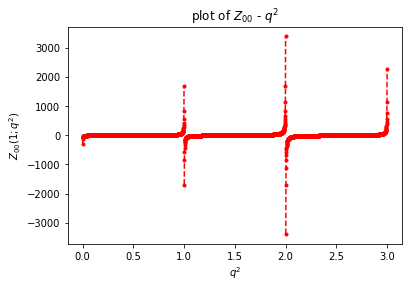

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import intzeta as iz
%matplotlib inline
# about need half min to run out the results

nplt=3000
q2=np.linspace(0.001,3,nplt)
Z=np.zeros(nplt)

for k in range(nplt):
    Z[k]=iz.zeta00(q2[k],13) # second parameter to control the max n^2 for A_{n^2}, default 13

plt.plot(q2,Z,'r.--')
plt.xlabel(r'$q^2$')
plt.ylabel(r'$Z_{00}(1;q^2)$')
plt.title('plot of $Z_{00}$ - $q^2$')
plt.savefig('zeta00.png')
plt.show()

> 另外补充一点，关于$q^2$很小时的$Z_{00}$渐进行为，$Z_{00}$的主要贡献项变为$A_{0}$:  
$Z_{00}\sim-\frac{1}{\sqrt{4\pi}}\frac{1}{q^2}-\pi+\sqrt{\pi}\int_{1}^{\infty}dy\sum_{\mathbf{n}\ne 0}e^{-(\pi^2y^2)\mathbf{n}^2}=-\frac{1}{\sqrt{4\pi}}\frac{1}{q^2}-\pi+2.66298\times10^{-5}$  
其中附加的常数项可以通过上文的程序(略作修改地)计算出来(参看intzeta.py)，当q很小的时候，补加的常熟项的贡献很小，忽略后就有：$Z_{00}\sim-\frac{1}{\sqrt{4\pi}q^2}$  
在q很小时候的近似结果和精确结果对比如下：

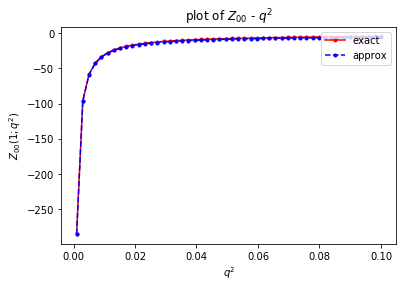

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import intzeta as iz
%matplotlib inline
# about need half min to run out the results

nplt=50
q2=np.linspace(0.001,0.1,nplt)
Z=np.zeros(nplt)
simZ=-1/np.sqrt(4*np.pi)*1/q2-np.pi+2.66298e-5
for k in range(nplt):
    Z[k]=iz.zeta00(q2[k],13) # second parameter to control the max n^2 for A_{n^2}, default 13

plt.plot(q2,Z,'r.-',q2,simZ,'b.--')
plt.xlabel(r'$q^2$')
plt.ylabel(r'$Z_{00}(1;q^2)$')
plt.title('plot of $Z_{00}$ - $q^2$')
plt.legend(('exact','approx'),loc=1)
plt.savefig('zeta00sim.png')
plt.show()

> b) solution  
即解决方程：
$$\pi^{-3/2}\mathcal{Z}_{00}(1;q^2)=\frac{1}{A_0}+\frac{R_0}{2}q^2$$
可以采取迭代求解：
$$q_{n+1}^2=\frac{2}{R_0}\pi^{-3/2}\mathcal{Z}_{00}(1;q_n^2)-\frac{2}{A_0 R_0}$$
由程序计算可知，合适的解为$q^2=0.79451566$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import intzeta as iz
%matplotlib inline

# 本题适合采用牛顿的对分法
m1=0.0001
m2=0.9999
ep=10**(-8)
while(True):
    q2=(m2+m1)/2
    ck=4*(np.pi)**(-3/2)*iz.zeta00(q2,28)-4-q2
    if(ck>0):
        m2=q2
    elif(ck<0):
        m1=q2
    else:
        break
    if((m2-m1)/(m1+m2)< ep ):
        break
print(q2)

0.7945156587213276
